# Base de datos Fuel Consumption

### Paqueterias

In [55]:
#Paqueteria para importar datos
import os
import pandas as pd
import glob 
import json

#Paqueteria para realizar la Regresion lineal multiple
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Paqueteria para realizar ANOVA
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

#Paqueteria para el grafico
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np


### Importar Base de Datos

In [56]:
datos_FuelConsumption_Path= os.path.expanduser("~/Desktop/Bases de datos - Proyecto/FuelConsumption.csv")
datos_FuelConsumption_Path

'/Users/sofiasaucedogarcia/Desktop/Bases de datos - Proyecto/FuelConsumption.csv'

In [57]:
datos_FuelConsumption= pd.read_csv(datos_FuelConsumption_Path)

In [58]:
datos_FuelConsumption.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Con el Analisis de Regresion 
Entenderemos la relacion entre las metricas engine size y fuel consumption city respecto a la metrica co2 emission 

### Regresion lineal Multiple

Consideremos el caso cuando tenemos $p-1$ variables predictoras $x_1,\ldots ,x_{p-1}$. El modelo de regresión lineal múltiple esta dado como

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_{p-1} x_{i,p-1} + \varepsilon_i$$

Es llamado **modelo de primer orden con $p-1$ variables** predictoras, donde

1. $\beta_0 , \ldots , \beta_{p-1}$ son parámetros.

2. $x_{i1},\ldots ,x_{i,p-1}$ son constantes conocidas.

3. $\varepsilon_i$ son independientes $N\left(0,\sigma^2 \right)$ con $i = 1,\ldots , n$.

In [59]:
x_engine=list(datos_FuelConsumption["ENGINESIZE"].values.reshape([datos_FuelConsumption["ENGINESIZE"].values.shape[0],1]))
x_fuelcity=list(datos_FuelConsumption["FUELCONSUMPTION_CITY"].values.reshape([datos_FuelConsumption["FUELCONSUMPTION_CITY"].values.shape[0],1]))
y_co2=list(datos_FuelConsumption["CO2EMISSIONS"].values.reshape([datos_FuelConsumption["CO2EMISSIONS"].values.shape[0],1]))


In [60]:

DFC = {'x_engine':x_engine,'x_fuelcity':x_fuelcity,'y_co2':y_co2}
DatosFC = pd.DataFrame(DFC)

# AJUSTAMOS EL MODELO A LAS VARIABLES DADAS
Linea_Regresion=LinearRegression()

Linea_Regresion.fit(DatosFC[['x_engine','x_fuelcity']],DatosFC[['y_co2']])

LinearRegression()

In [61]:
#EL VALOR DE LA INTERSECCION ES
Linea_Regresion.intercept_

array([80.46959986])

In [62]:
#EL VALOR DE LOS COEFICIENTES ES
Linea_Regresion.coef_

array([[18.45983255,  8.57268455]])

$$y_{co2} = 80.46959986 + 18.45983255 x_{engine} + 8.57268455 x_{fuelcity} +  \varepsilon_i$$


### Usaremos ANOVA para realizar la prueba de hipotesis 
En el caso de la regresión lineal múltiple el **ANOVA** nos ayuda a probar si existe una relación entre la variable de respuesta $y$ y el conjunto de variables $x_1,\ldots ,x_{p-1}$, esto es, al menos una de las variables es significativa o todas son no significativas.

In [63]:
def M_H (Data_X):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
    '''
    import pandas as pd
    import numpy as np
    Transpuesta = Data_X.transpose()
    A_ = pd.DataFrame(np.dot(Transpuesta,Data_X))
    A = pd.DataFrame(np.linalg.inv(A_))
    return pd.DataFrame(np.dot(np.dot(Data_X,A),Transpuesta))
    
def SSTO (Data_Y):
    '''
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.
             
             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'
             
             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    n = len(Data_Y.index)
    M_I = pd.DataFrame(np.diagflat(list(1 for i in range (n))))
    M_1 = pd.DataFrame(np.ones((n,n)))
    Transpuesta = Data_Y.transpose()
    A = M_I - (1/n)*M_1
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))

def SSE (Data_X,Data_Y):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
             
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.
             
             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'
             
             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    H = M_H(Data_X)
    M_I = pd.DataFrame(np.diagflat(list(1 for i in range (len(H.index)))))
    Transpuesta = Data_Y.transpose()
    A = M_I - H
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))

def SSR (Data_X,Data_Y):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
             
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.
             
             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'
             
             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    n = len(Data_Y.index)
    H = M_H(Data_X)
    M_1 = pd.DataFrame(np.ones((n,n)))
    Transpuesta = Data_Y.transpose()
    A = H - (1/n)*M_1
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))
    
    
def ANOVA_RLM (Alpha,Data_X,Data_Y):
    '''
    Alpha : Es la probabilidad deseada.
    
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
             
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.
             
             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'
             
             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    from scipy.stats import f
    import pandas as pd
    import numpy as np
    Data_X['1'] = 1
    n = len(Data_Y.index)
    p_1 = len(Data_X.columns)-1
    n_p = (n-1)-p_1
    ssr = SSR(Data_X,Data_Y)
    sse = SSE(Data_X,Data_Y)
    ssto = SSTO(Data_Y)
    msr = ssr/p_1
    mse = sse/n_p
    Estadistico_Prueba = msr/mse
    Critico = f.isf(Alpha,p_1,n_p)
    return [pd.DataFrame({'SS':[ssr,sse,ssto],'GL':[p_1,n_p,n-1],
            'MS':[msr,mse,np.nan],
            'Estadistico de Prueba':[Estadistico_Prueba,np.nan,np.nan],
            'Valor Critico':[Critico,np.nan,np.nan]},index = ['Regresion','Error','Total']),Estadistico_Prueba>Critico]

In [64]:
#VEAMOS EL ANOVA
ANOVA_RLM(0.05,datos_FuelConsumption.loc[:,["ENGINESIZE","FUELCONSUMPTION_CITY"]],datos_FuelConsumption.loc[:,"CO2EMISSIONS"].to_frame())[0]

,SS,GL,MS,Estadistico de Prueba,Valor Critico
Regresion,3.676461e+06,2,1.838231e+06,3234.74236,3.004183
Error,6.046470e+05,1064,5.682773e+02,NaN,NaN
Total,4.281108e+06,1066,NaN,NaN,NaN


In [65]:
#VEAMOS SI RECHAZAMOS O NO LA HIPOTESIS NULA
ANOVA_RLM(0.05,datos_FuelConsumption.loc[:,["ENGINESIZE","FUELCONSUMPTION_CITY"]],datos_FuelConsumption.loc[:,"CO2EMISSIONS"].to_frame())[1]

True

En este caso rechazar la hipótesis nula implica que la ecuación de regresión difiere de una constante, es decir, al menos una variable regresora es importante.

### El coeficiente de determinacion $R^2$

El coeficiente de determinación nos dice lo cerca que están los datos de la línea de regresión ajustada.


In [66]:
print('El coeficiente de determinacion es ',Linea_Regresion.score(DatosFC[['x_engine','x_fuelcity']], DatosFC[["y_co2"]]))

El coeficiente de determinacion es  0.8587639001803145


Como el coeficiente de determinacion es cercano a 1 , la linea de regresion es buen ajuste a los datos

### Visualizacion de manera grafica de la recta de regresion obtenida

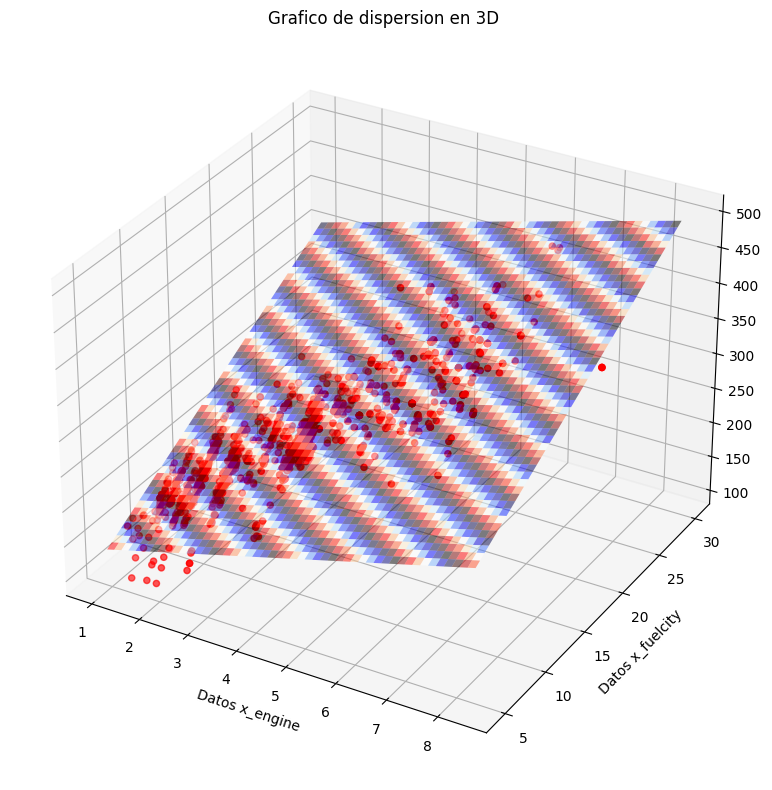

In [67]:
#CREAMOS EL GRAFICO
grafo = plt.figure(figsize = (10,8))

#CREAMOS 3D
ax = plt.axes(projection = '3d')

#DIBUJAMOS LOS PUNTOS DE DISPERSION
ax.scatter3D(x_engine,x_fuelcity,y_co2,color = 'red') #GRAFICAMOS LOS PUNTOS

#CREAMOS LA RECTA DE REGRESION EN 3D
x_engine_graf, x_fuelcity_graf = np.linspace(min(x_engine),max(x_engine)), np.linspace(min(x_fuelcity),max(x_fuelcity))
X_1,X_2 = np.meshgrid(x_engine_graf,x_fuelcity_graf) #MALLA DEL PLANO
y_co2 = 80.46959986 + 18.45983255*X_1 + 8.57268455*X_2 #ECUACION OBTENIDA, COMO METEMOS LOS DATOS?
ax.plot_surface(X_1,X_2,y_co2,
                alpha = 0.5, #TRANSPARENCIA
                cmap = 'flag') #MAPAS DE COLORES

#CARACTERISTICAS DEL GRAFICO
plt.title('Grafico de dispersion en 3D')
plt.xlabel('Datos x_engine')
plt.ylabel('Datos x_fuelcity')

plt.tight_layout()